<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : reza vahidimajd
### Student Number : 99102491
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
#TODO

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("heart_disease.csv")


target = df["target"]
df.drop(columns = ["target"], inplace = True)

target = target.replace(0, -1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.33, random_state = 42)

print(y_train.iloc[-1])
print(x_train.to_numpy())


-1
[[41.  1.  2. ...  2.  0.  2.]
 [58.  1.  1. ...  1.  4.  3.]
 [50.  1.  0. ...  1.  0.  3.]
 ...
 [51.  1.  0. ...  2.  0.  3.]
 [43.  1.  0. ...  2.  0.  3.]
 [52.  1.  0. ...  2.  1.  2.]]


### Adaboost Algorithm Implementation (40 points)

In [3]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    sum_diff = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            sum_diff += w[i]
    return sum_diff / sum(w)
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1 - error) / error)
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            w[i] *= np.exp(alpha)
            
    return [float(i)/sum(w) for i in w]
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        
        pred_ys = []
        
        w = []
        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                w = []
                for i in range(len(y)):
                    w.append(1 / len(y))
                
            else:
                #TODO
                w = w / np.sum(w)
                
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            clf = DecisionTreeClassifier(max_depth = 1)
            clf = clf.fit(X, y, sample_weight= w)
            y_pred = clf.predict(X)
            pred_ys.append(y_pred)
            self.G_M.append(clf)

            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            
            self.training_errors.append(calculate_error(y, pred_ys[-1], w))

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            
            self.alphas.append(calculate_alpha(self.training_errors[-1]))
            
            w = update_weights(w, self.alphas[-1], y, pred_ys[-1])


    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [4]:
#TODO : Fit model

adaBoost = AdaBoost()
adaBoost.fit(x_train.to_numpy(), y_train.to_numpy())

#TODO : Predict on test data

y_pred = adaBoost.predict(x_test.to_numpy())

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:  " + str(accuracy))
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=-1)
print("precission:  " + str(precision_positive) ,  str(precision_negative))

recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=-1)
print("recall:  " + str(recall_sensitivity), str(recall_specificity))

f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_negative = metrics.f1_score(y_test, y_pred, pos_label=-1)
print("f1 score:  " + str(f1_positive), str(f1_negative)) 

accuracy:  0.8466076696165191
precission:  0.8411764705882353 0.8520710059171598
recall:  0.8511904761904762 0.8421052631578947
f1 score:  0.8461538461538461 0.8470588235294118


In [5]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)

model = abc.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:  " + str(accuracy))
precision_positive = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negative = metrics.precision_score(y_test, y_pred, pos_label=-1)
print("precission:  " + str(precision_positive) ,  str(precision_negative))

recall_sensitivity = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_specificity = metrics.recall_score(y_test, y_pred, pos_label=-1)
print("recall:  " + str(recall_sensitivity), str(recall_specificity))

f1_positive = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_negative = metrics.f1_score(y_test, y_pred, pos_label=-1)
print("f1 score:  " + str(f1_positive), str(f1_negative)) 


accuracy:  0.8731563421828908
precission:  0.8881987577639752 0.8595505617977528
recall:  0.8511904761904762 0.8947368421052632
f1 score:  0.8693009118541033 0.8767908309455587


### Early Stopping (15 points)

In [6]:
#TODO : Calculate validation error for different number of estimators 
estimators = []
error = []
for i in range(10, 1000, 10):
    adaBoost = AdaBoost()
    adaBoost.fit(x_train.to_numpy(), y_train.to_numpy(), i)
    y_pred = adaBoost.predict(x_test.to_numpy())
    accuracy = metrics.accuracy_score(y_test, y_pred)
    estimators.append(i)
    error.append(1 - accuracy)

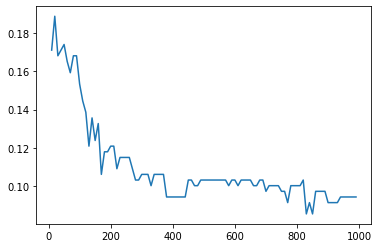

In [7]:
#TODO : Plot validation error versus number of estimators figure.

plt.plot(estimators, error)

In [9]:
#TODO : Print the best number for estimators and minimum value for validation error.

print("error: " + str(min(error)))
print("estimators: " + str(estimators[error.index(min(error))]))

error: 0.08554572271386429
estimators: 830


### Weighted Error (10 points)

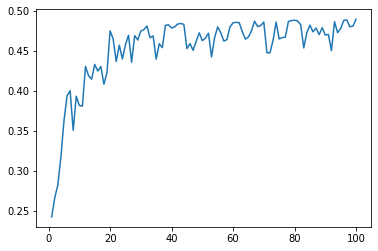

In [10]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.

estimators = []
error = []
#for i in range(50, 1000, 50):
adaBoost = AdaBoost()
adaBoost.fit(x_train.to_numpy(), y_train.to_numpy(), 100)
error.append(adaBoost.training_errors[-1])
for i in range(1, 101):
    estimators.append(i)
plt.plot(estimators, adaBoost.training_errors)

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

In [ ]:
# we normalize sample weights in each loop
# by increasing number of classifiers, nominator of the fraction increases but denominator is fixed(1) 
# so the error will increase